In [1]:
# import libraries
import pandas as pd
import numpy as np

# to visualize the data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess the data 
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# For classification tasks 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestRegressor, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier


# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score , mean_absolute_error  , mean_squared_error , r2_score

# to save the model 
import pickle

import warnings 
warnings.filterwarnings('ignore')

In [2]:
import sys
print(sys.executable)

d:\AISYAH\KULIAH\BENGKEL KODING\Tugas Akhir\cardiovascular-prediction\cardiovascular-env\Scripts\python.exe


### Load the Dataset

In [3]:
# Load the dataset 
df = pd.read_csv('heart_disease.csv')
df.head()

id    age   sex      dataset         cp                trestbps   chol  \
0    1    63   Male     Cleveland       typical angina    145        233    
1    2    67   Male     Cleveland       asymptomatic      160        286    
2    3    67   Male     Cleveland       asymptomatic      120        229    
3    4    37   Male     Cleveland       non-anginal       130        250    
4    5    41   Female   Cleveland       atypical angina   130        204    

    fbs     restecg            thalch   exang   oldpeak   slope         ca  \
0   TRUE    lv hypertrophy     150      FALSE   2.3       downsloping   0    
1   FALSE   lv hypertrophy     108      TRUE    1.5       flat          3    
2   FALSE   lv hypertrophy     129      TRUE    2.6       flat          2    
3   FALSE   normal             187      FALSE   3.5       downsloping   0    
4   FALSE   lv hypertrophy     172      FALSE   1.4       upsloping     0    

    thal                num  
0   fixed defect          0  
1   normal                2  
2   reversable defect     1  
3   normal                0  
4   normal                0

In [4]:
# exploring datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  920 non-null    int64 
 1    age                920 non-null    int64 
 2    sex                920 non-null    object
 3    dataset            920 non-null    object
 4    cp                 920 non-null    object
 5    trestbps           920 non-null    object
 6    chol               920 non-null    object
 7    fbs                920 non-null    object
 8    restecg            920 non-null    object
 9    thalch             920 non-null    object
 10   exang              920 non-null    object
 11   oldpeak            920 non-null    object
 12   slope              920 non-null    object
 13   ca                 920 non-null    object
 14   thal               920 non-null    object
 15   num                920 non-null    int64 
dtypes: int64(3), object(13)
me

In [5]:
# Check the shape of data 
df.shape

(920, 16)

In [6]:
# Bersihkan spasi di nama kolom
df.columns = df.columns.str.strip()

print(df.columns)


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [7]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [8]:
# Id Column
df["id"].describe()

count    920.000000
mean     460.500000
std      265.725422
min        1.000000
25%      230.750000
50%      460.500000
75%      690.250000
max      920.000000
Name: id, dtype: float64

- By Seeing the Id column , the total number of people in this datset are 920.

In [9]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

- The Average Age is 53.

<Axes: xlabel='age', ylabel='Count'>

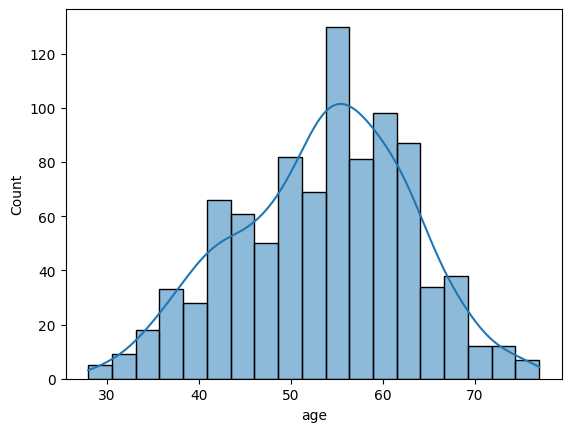

In [10]:
sns.histplot(df['age'],kde=True)

Mean:  53.51086956521739
Mode:  54
Median:  54.0


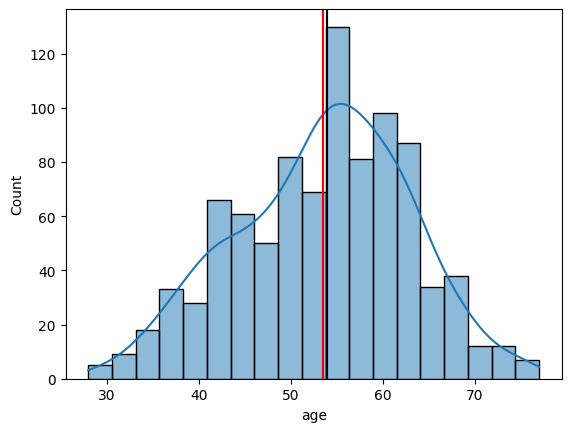

In [11]:
# Check mean,median and mode of age column
Mean = df['age'].mean()
Mode = df['age'].mode()[0]
Median = df['age'].median()
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].mode()[0],color='blue')
plt.axvline(df['age'].median(),color='black')

print('Mean: ', Mean)
print('Mode: ', Mode)
print('Median: ', Median)

In [12]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [13]:
# Lets explore the age column based on gender 

fig = px.histogram(data_frame=df,x='age',color='sex')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [ ]:
# Lets calculate male and female percentage 
Male_count = 726
Female_count = 194

# Check male percentage 
Male_Per = (Male_count/920)*100
Female_Per = (Female_count/920) * 100

print("The percentage of Male having heart disease are:",Male_Per)
print("The percentage of Female having heart disease are:",Female_Per)

The percentage of Male having heart disease are: 78.91304347826087
The percentage of Female having heart disease are: 21.086956521739133


In [ ]:
# Find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [ ]:
# Lets deal with dataset Column 
df['dataset'].unique()

array([' Cleveland    ', ' Hungary      ', ' Switzerland  ',
       ' VA Long Beach'], dtype=object)

In [14]:
# Find unique values count in the dataset column 
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [15]:
# lets check the dataset column with respect with sex column
fig = px.histogram(data_frame=df,x='age',color='dataset')
fig.show()

# lets find the mean , median and mode of age column with respect to dataset column
print(df.groupby('dataset')['age'].mean())
print('----------------------------------')
print(df.groupby('dataset')['age'].median())
print('----------------------------------')
print(df.groupby('dataset')['age'].agg(pd.Series.mode))


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# make piechat of dataset column 
fig = px.sunburst(df,path=['dataset','sex'])
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [16]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [17]:
fig = px.sunburst(df,path=['dataset','cp'])
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [18]:
# Draw the plot of age column groupby by cp column
fig = px.histogram(data_frame=df,x='age',color='cp')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<Axes: xlabel='cp', ylabel='count'>

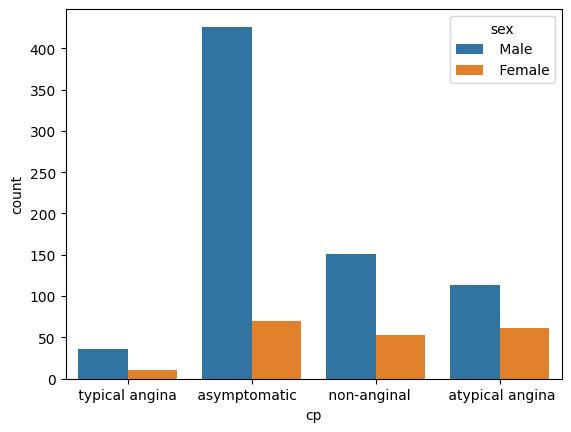

In [19]:
# count plot of cp column by sex
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

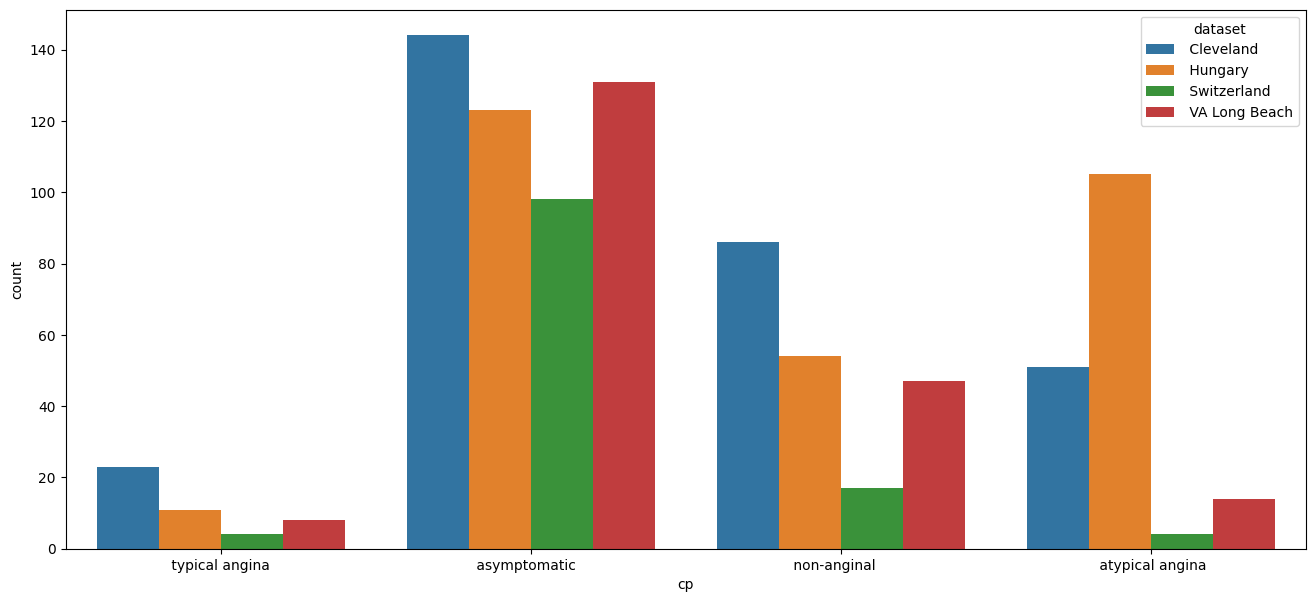

In [20]:
# Draw the plot of cp column with respect to dataset
plt.figure(figsize=(16,7))
sns.countplot(df,x='cp',hue='dataset')

In [21]:
df['trestbps'].describe()

count           920
unique           62
top        120     
freq            131
Name: trestbps, dtype: object

In [22]:
df['trestbps'].min()

'         '

In [23]:
df = df[df['trestbps'] != 0]

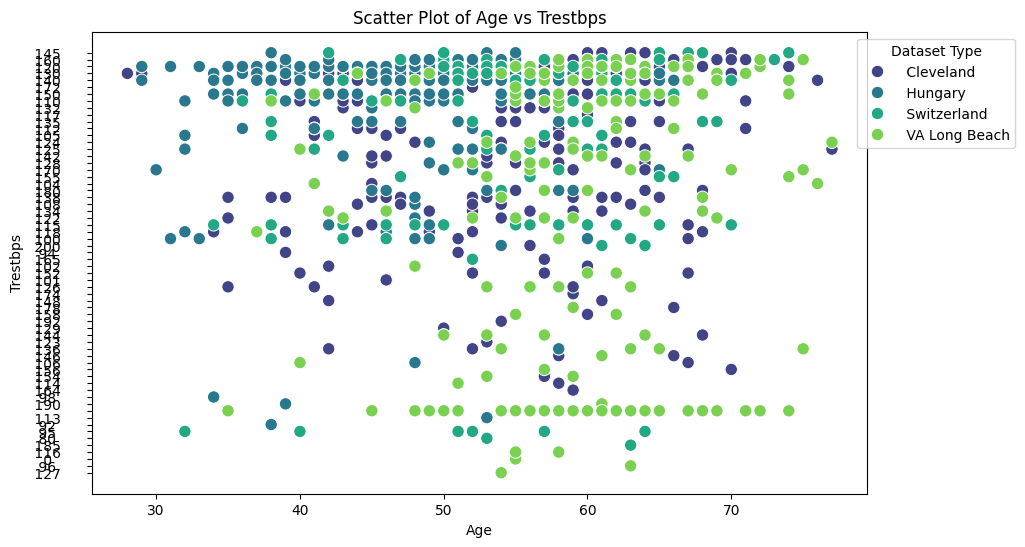

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='trestbps', hue='dataset', palette='viridis', s=80)

plt.title('Scatter Plot of Age vs Trestbps')
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.legend(title='Dataset Type', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

<Axes: xlabel='trestbps', ylabel='Count'>

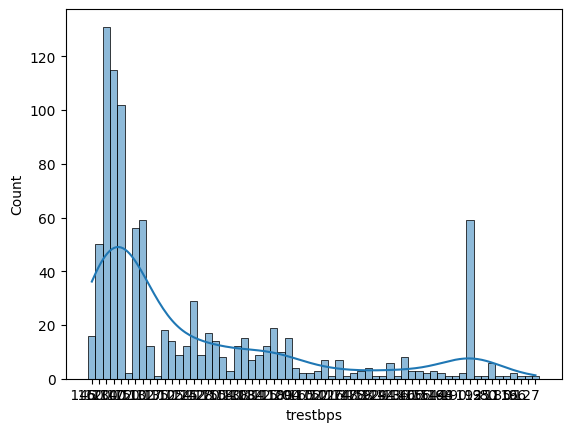

In [25]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

In [26]:
# Bersihkan semua kolom tipe object
df = df.apply(lambda col: col.str.strip().replace('\s+', ' ', regex=True) 
              if col.dtype == 'object' else col)

In [27]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', ''], dtype=object)

In [28]:
df['restecg'] = df['restecg'].str.replace('-', '')

In [29]:
# Define the columns you want to explore
columns_to_explore = ['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Display datatype, value counts, and other insights for each column
for column in columns_to_explore:
    print(f"Column: {column}")
    print(f"Datatype: {df[column].dtype}")
    print(f"Value Counts:\n{df[column].value_counts()}\n")
    print(f"Number of unique values: {df[column].nunique()}")
    if df[column].dtype == 'object':
        print(f"Top value: {df[column].mode()[0]}")
    else:
        print(f"Mean: {df[column].mean()}")
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
    print("-" * 50)

# Additional insights (mean, min, max, etc.) for numerical columns
numerical_columns = ['chol', 'trestbps', 'thalch', 'oldpeak', 'ca']

print("Additional insights for numerical columns:")
print(df[numerical_columns].describe())

# Additional insights for categorical columns
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']

print("\nAdditional insights for categorical columns:")
for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Unique values: {df[column].unique()}")
    print("-" * 50)



Column: chol
Datatype: object
Value Counts:
chol
0      172
        30
220     10
254     10
211      9
      ... 
176      1
157      1
169      1
278      1
385      1
Name: count, Length: 218, dtype: int64

Number of unique values: 218
Top value: 0
--------------------------------------------------
Column: fbs
Datatype: object
Value Counts:
fbs
FALSE    692
TRUE     138
          90
Name: count, dtype: int64

Number of unique values: 3
Top value: FALSE
--------------------------------------------------
Column: restecg
Datatype: object
Value Counts:
restecg
normal             551
lv hypertrophy     188
stt abnormality    179
                     2
Name: count, dtype: int64

Number of unique values: 4
Top value: normal
--------------------------------------------------
Column: thalch
Datatype: object
Value Counts:
thalch
       55
150    43
140    41
120    35
130    30
       ..
195     1
87      1
187     1
192     1
73      1
Name: count, Length: 120, dtype: int64

Number of unique

In [30]:
# Again check the missing values 
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [31]:
# lets deal with thal column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [32]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

[]

In [33]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [34]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [35]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [36]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

In [37]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        920 non-null    int64 
 1   age       920 non-null    int64 
 2   sex       920 non-null    object
 3   dataset   920 non-null    object
 4   cp        920 non-null    object
 5   trestbps  920 non-null    object
 6   chol      920 non-null    object
 7   fbs       920 non-null    object
 8   restecg   920 non-null    object
 9   thalch    920 non-null    object
 10  exang     920 non-null    object
 11  oldpeak   920 non-null    object
 12  slope     920 non-null    object
 13  ca        920 non-null    object
 14  thal      920 non-null    object
 15  num       920 non-null    int64 
dtypes: int64(3), object(13)
memory usage: 115.1+ KB


In [39]:
import pandas as pd
from scipy import stats

# Sample DataFrame
# Assume your DataFrame is named 'df'
# df = ...

# Define the columns to check for outliers
columns_to_check = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculate Z-scores for the specified columns
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Define a Z-score threshold for outlier detection (you can adjust this threshold)
z_score_threshold = 2.8

# Identify outliers using the threshold
outliers = (z_scores > z_score_threshold).any(axis=1)

# Display the rows containing outliers
print("Rows with outliers:")
print(df[outliers])

# Remove outliers
df = df[~outliers]

# Display the DataFrame without outliers
print("\nDataFrame without outliers:")
print(df.head(5))


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# creating box plots to visulize the columns havon no outliers
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()
fig = px.box(data_frame=df, y='ca')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [40]:
# Membagi kolom berdasarkan tipe datanya
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
kategori_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Plot distribusi untuk fitur numerik (Histogram)
for col in numerik_cols:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribusi: {col}', marginal="box", color_discrete_sequence=['#64b5f6'])
    fig.update_layout(bargap=0.1)
    fig.show()

# Plot distribusi untuk fitur kategorikal (Bar Plot)
for col in kategori_cols:
    count_series = df[col].value_counts().reset_index()
    count_series.columns = [col, 'Count']
    fig = px.bar(count_series, x=col, y='Count', title=f'Distribusi: {col}', text='Count', color_discrete_sequence=['#4db6ac'])
    fig.update_traces(textposition='outside')
    fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Mapping nama dari SHAP ke nama di df
shap_to_df_mapping = {
    'num_major_vessels': 'ca',
    'chest_pain_type': 'cp',
    'thalassemia_type': 'thal',
    'st_slope_type': 'slope',
    'cholesterol': 'chol',
    'st_depression': 'oldpeak',
    'resting_blood_pressure': 'trestbps',
    'age': 'age',
    'exercise_induced_angina': 'exang',
    'max_heart_rate_achieved': 'thalch',
    'Restecg': 'restecg',
    'sex': 'sex',
    'fasting_blood_sugar': 'fbs',
    'country': 'dataset'
}

# Set up layout: 4 kolom x 4 baris
rows = 4
cols = 4

fig = make_subplots(rows=rows, cols=cols, subplot_titles=list(shap_to_df_mapping.keys()))

row = 1
col = 1

for shap_name, df_col in shap_to_df_mapping.items():
    if df[df_col].dtype in ['int64', 'float64']:
        hist = go.Histogram(x=df[df_col], name=df_col, marker=dict(color='#64b5f6'))
        fig.add_trace(hist, row=row, col=col)
    else:
        value_counts = df[df_col].value_counts()
        bar = go.Bar(x=value_counts.index, y=value_counts.values, name=df_col, marker=dict(color='#4db6ac'))
        fig.add_trace(bar, row=row, col=col)

    col += 1
    if col > cols:
        col = 1
        row += 1

# Layout
fig.update_layout(height=1000, width=1200, title_text="Distribution Data", showlegend=False)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [41]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

shap_to_df_mapping = {
    'num_major_vessels': 'ca',
    'chest_pain_type': 'cp',
    'thalassemia_type': 'thal',
    'st_slope_type': 'slope',
    'cholesterol': 'chol',
    'st_depression': 'oldpeak',
    'resting_blood_pressure': 'trestbps',
    'sex': 'sex',
    'age': 'age',
    'max_heart_rate_achieved': 'thalch',
    'Restecg': 'restecg',
    'exercise_induced_angina': 'exang',
    'fasting_blood_sugar': 'fbs',
    'country': 'dataset'
}

# Set up layout: 4 kolom x 4 baris
rows = 4
cols = 4

# Perbesar subplot_titles secara manual dengan HTML-style font size
subplot_titles = [f"<b><span style='font-size:14pt'>{title}</span></b>" for title in shap_to_df_mapping.keys()]
fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)

row = 1
col = 1

for shap_name, df_col in shap_to_df_mapping.items():
    if df[df_col].dtype in ['int64', 'float64']:
        hist = go.Histogram(x=df[df_col], name=df_col, marker=dict(color='#64b5f6'))
        fig.add_trace(hist, row=row, col=col)
    else:
        value_counts = df[df_col].value_counts()
        bar = go.Bar(x=value_counts.index, y=value_counts.values, name=df_col, marker=dict(color='#4db6ac'))
        fig.add_trace(bar, row=row, col=col)

    col += 1
    if col > cols:
        col = 1
        row += 1

# Layout update
fig.update_layout(
    height=1000,
    width=1200,
    title_text="<b>Distribution Data</b>",
    title_font=dict(size=24),          # Ukuran judul utama
    font=dict(size=14),                # Ukuran font umum di plot
    showlegend=False
)

# Perbesar font label sumbu dan angka ticks
fig.update_xaxes(title_font=dict(size=16), tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16), tickfont=dict(size=14))

# Perbesar font untuk nilai angka pada legenda dan kategori
fig.update_layout(
    xaxis_tickfont=dict(size=14),    # Ukuran font angka pada sumbu X
    yaxis_tickfont=dict(size=14)     # Ukuran font angka pada sumbu Y
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [42]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame

# Scatter plot for thalch and oldpeak
fig1 = px.scatter(df, x='thalch', y='oldpeak', title='Scatter Plot: thalch vs oldpeak')

# Box plot for restecg and thalch
fig2 = px.box(df, x='restecg', y='thalch', title='Box Plot: thalch vs restecg')

# Violin plot for slope and thalch
fig3 = px.violin(df, x='slope', y='thalch', title='Violin Plot: thalch vs slope')

# Histogram for ca
fig4 = px.histogram(df, x='ca', title='Histogram: ca')

# Bar plot for fbs
fig5 = px.bar(df, x='fbs', title='Bar Plot: fbs')

# Pie chart for exang
fig6 = px.pie(df, names='exang', title='Pie Chart: exang')

# Display the plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

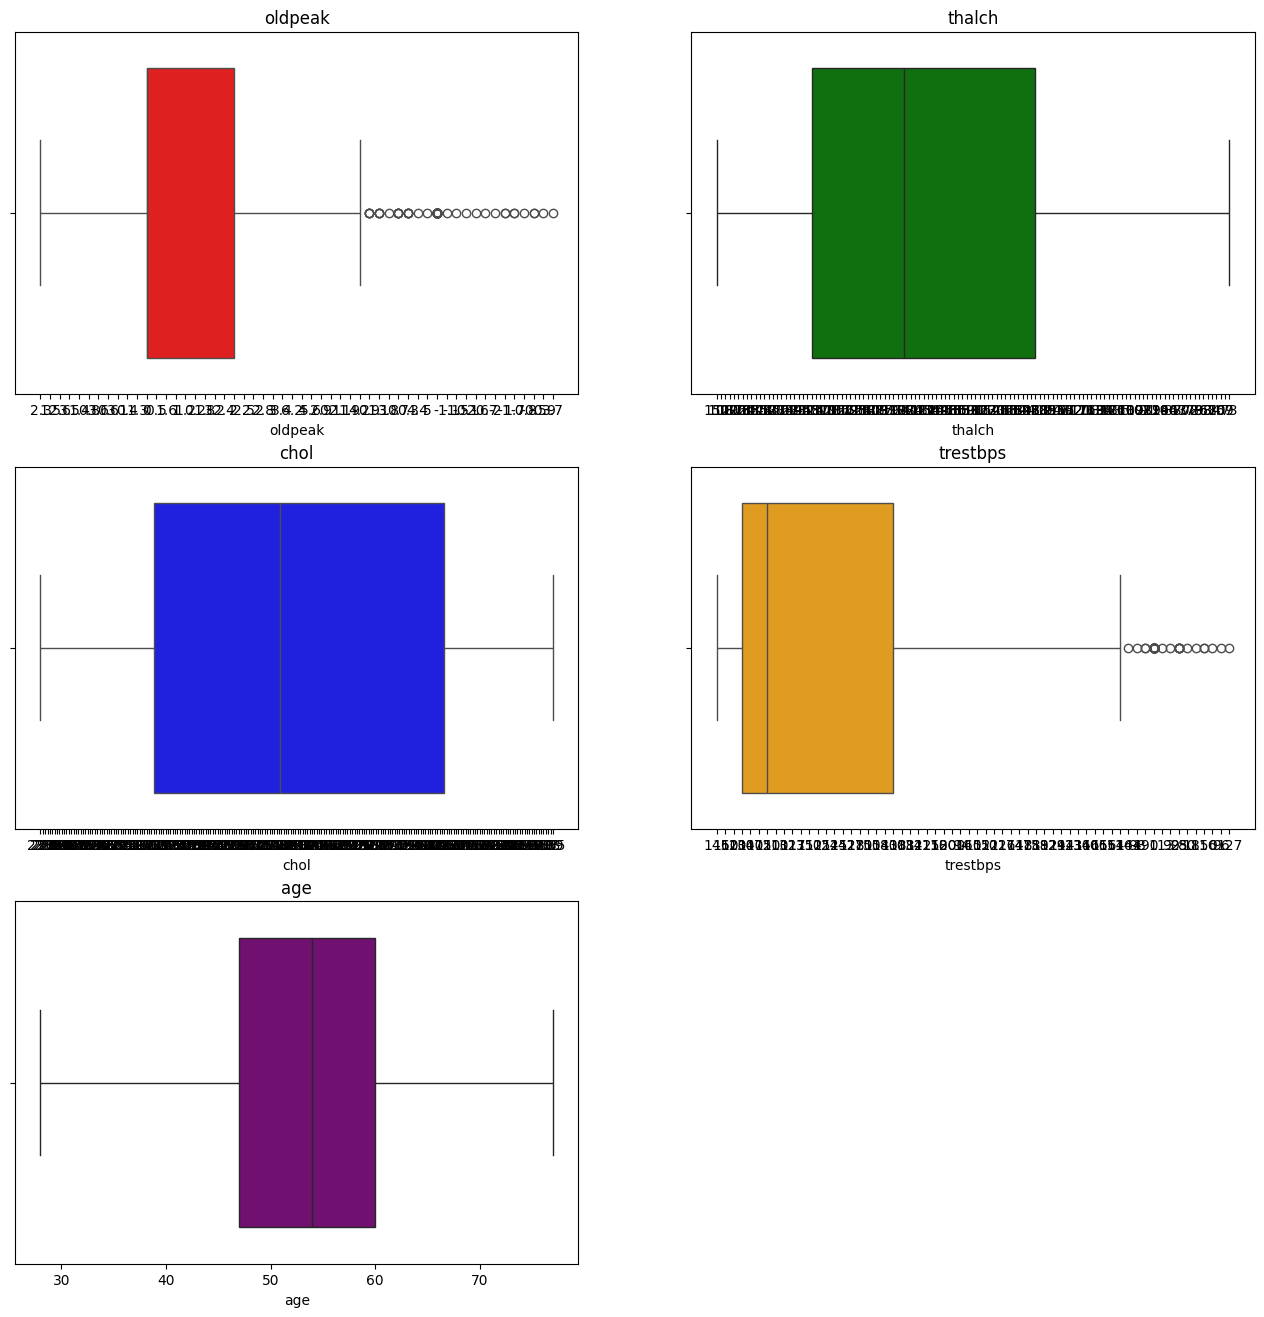

In [ ]:
plt.figure(figsize=(16,16))

color = ['red','green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col],color=color[i])
    plt.title(col)

plt.show()

In [43]:
df_pie = df['dataset'].value_counts().reset_index()
df_pie.columns = ['dataset', 'count']
fig7 = px.pie(df_pie, values='count', names='dataset')
fig7.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [44]:
# create sunburst plot on titanic dataset
fig = px.sunburst(df,path=['sex','dataset'], values='age' , color='num')
# Show the plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig1 = px.scatter(df, x='age', y='chol', color='sex', size='trestbps', hover_data=['cp', 'dataset'])
fig1.update_layout(title='Scatter Plot: Age vs Cholesterol (colored by sex, sized by trestbps)')
fig1.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [45]:
fig2 = px.box(df, x='sex', y='thalch', color='sex', points="all", hover_data=['cp', 'dataset'])
fig2.update_layout(title='Box Plot: Thalch distribution by Sex')
fig2.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [46]:
fig3 = px.histogram(df, x='age', color='sex', marginal='box', nbins=20, hover_data=['cp', 'dataset'])
fig3.update_layout(title='Histogram: Age distribution (colored by sex)')
fig3.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [47]:
fig4 = px.bar(df, x='cp', y='num', color='sex', barmode='group', facet_col='dataset', 
              category_orders={'cp': ['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']},
              hover_data=['age', 'chol'])
fig4.update_layout(title='Bar Chart: Number of cases by Chest Pain Type (colored by sex)')
fig4.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import plotly.express as px

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Scatter plot matrix for 'age', 'trestbps', 'chol', 'thalch', colored by 'sex'
scatter_matrix_sex = px.scatter_matrix(df, dimensions=['age', 'trestbps', 'chol', 'thalch'], color='sex',
                                       title='Scatter Plot Matrix with Gender Color')



# Bar chart for 'fbs' and 'restecg' with 'num' as color
bar_fbs_restecg_num = px.bar(df, x='fbs', color='restecg', facet_col='num', title='Bar Chart for Fasting Blood Sugar and Resting ECG vs Heart Disease')
bar_chol_num = px.bar(df, x='chol', facet_col='num', title='Bar Chart for Cholestrol and Resting ECG vs Heart Disease')

# Display the plots
scatter_matrix_sex.show()
bar_fbs_restecg_num.show()
bar_chol_num.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# modelling

In [48]:
# In some of the features, there is space will will create problem later on. 
# So we rename those attributes to handle problems in the future.
df['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
df['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
df['restecg'].replace({'normal': 'normal' , 'st-t abnormality': 'ST-T_wave_abnormality' , 'lv hypertrophy': 'left_ventricular_hypertrophy' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = df[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs','restecg' , 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
data_1['target'] = ((df['num'] > 0)*1).copy()
# Encoding Sex 
data_1['sex'] = (df['sex'] == 'Male')*1
# Encoding Fbs and exang
data_1['fbs'] = (df['fbs'])*1
data_1['exang'] = (df['exang'])*1
# Renaming COlumns Names.
data_1.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar','Restecg',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
# Load Data Sample 
data_1.head()

age  sex  chest_pain_type    country resting_blood_pressure cholesterol  \
0   63    1   typical_angina  Cleveland                    145         233   
1   67    1     asymptomatic  Cleveland                    160         286   
2   67    1     asymptomatic  Cleveland                    120         229   
3   37    1      non-anginal  Cleveland                    130         250   
4   41    0  atypical_angina  Cleveland                    130         204   

  fasting_blood_sugar                       Restecg max_heart_rate_achieved  \
0                TRUE  left_ventricular_hypertrophy                     150   
1               FALSE  left_ventricular_hypertrophy                     108   
2               FALSE  left_ventricular_hypertrophy                     129   
3               FALSE                        normal                     187   
4               FALSE  left_ventricular_hypertrophy                     172   

  exercise_induced_angina st_depression st_slope_type num_major_vessels  \
0                   FALSE           2.3   downsloping                 0   
1                    TRUE           1.5          flat                 3   
2                    TRUE           2.6          flat                 2   
3                   FALSE           3.5   downsloping                 0   
4                   FALSE           1.4     upsloping                 0   

    thalassemia_type  target  
0       fixed_defect       0  
1             normal       1  
2  reversable_defect       1  
3             normal       0  
4             normal       0

## Let make X and y in our Data:

In [49]:
X = data_1.drop('target',axis=1)
y = data_1['target']

# Encode X using data seperate label encoder for all categorical columns 
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object'  or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## **Enlist all the models that we will use to predict the heart disease.**
**_Models should be classifiers for multi-class classifications_**:
- logistic regression
- SVM
- KNN
- Gradient Boost Classifier
- Random Forest
- Decision Tree
- NB
- XGBoost
- lightGBM
- CatBoost Classifier

In [50]:
# Define models
models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('SVM', SVC(random_state=42, probability=True)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('GaussianNB', GaussianNB()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('XGBClassifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
    ('BaggingClassifier', BaggingClassifier(random_state=42)),
    ('CatBoostClassifier', CatBoostClassifier(random_state=42, verbose=0)),
]


## Train and evaluate models

LogisticRegression Accuracy: 0.80
LogisticRegression F1 Score: 0.80
LogisticRegression Precision: 0.81
LogisticRegression Recall (TPR): 0.80
LogisticRegression True Negative Rate (TNR): 0.85
LogisticRegression True Positive Rate (TPR): 0.76
LogisticRegression ROC AUC: 0.86
--------------------------------------------------


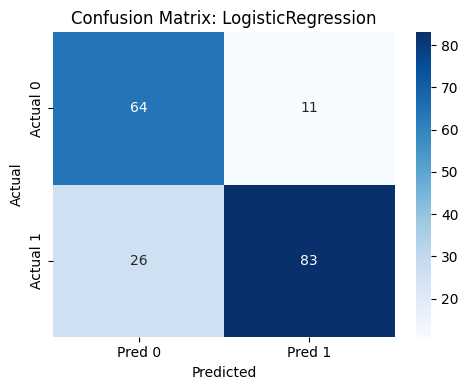

SVM Accuracy: 0.76
SVM F1 Score: 0.76
SVM Precision: 0.76
SVM Recall (TPR): 0.76
SVM True Negative Rate (TNR): 0.71
SVM True Positive Rate (TPR): 0.79
SVM ROC AUC: 0.82
--------------------------------------------------


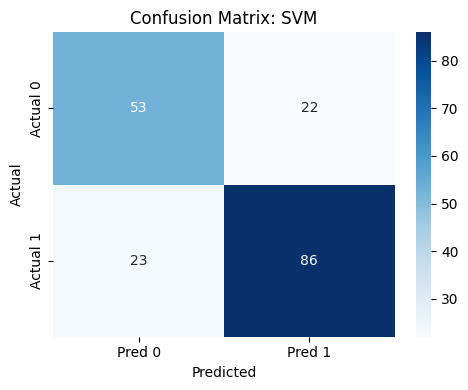

DecisionTreeClassifier Accuracy: 0.77
DecisionTreeClassifier F1 Score: 0.77
DecisionTreeClassifier Precision: 0.78
DecisionTreeClassifier Recall (TPR): 0.77
DecisionTreeClassifier True Negative Rate (TNR): 0.79
DecisionTreeClassifier True Positive Rate (TPR): 0.75
DecisionTreeClassifier ROC AUC: 0.77
--------------------------------------------------


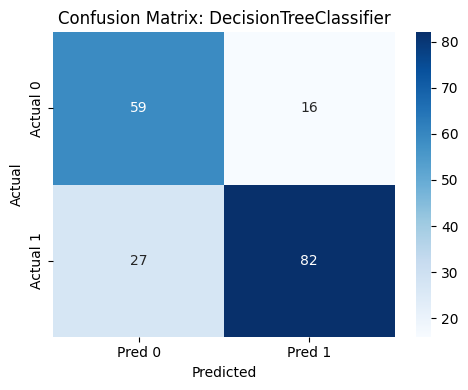

RandomForestClassifier Accuracy: 0.84
RandomForestClassifier F1 Score: 0.84
RandomForestClassifier Precision: 0.84
RandomForestClassifier Recall (TPR): 0.84
RandomForestClassifier True Negative Rate (TNR): 0.84
RandomForestClassifier True Positive Rate (TPR): 0.83
RandomForestClassifier ROC AUC: 0.91
--------------------------------------------------


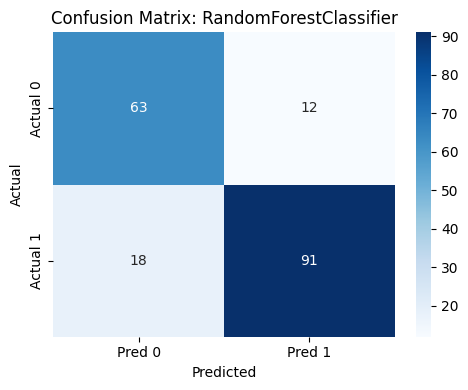

GaussianNB Accuracy: 0.80
GaussianNB F1 Score: 0.80
GaussianNB Precision: 0.81
GaussianNB Recall (TPR): 0.80
GaussianNB True Negative Rate (TNR): 0.84
GaussianNB True Positive Rate (TPR): 0.77
GaussianNB ROC AUC: 0.87
--------------------------------------------------


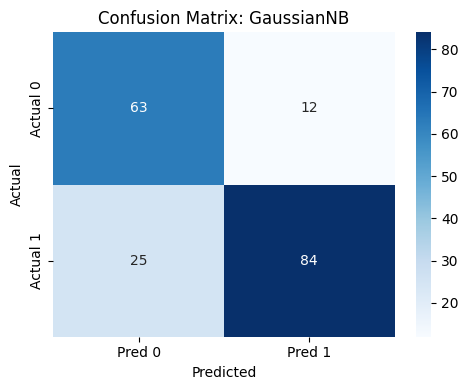

KNeighborsClassifier Accuracy: 0.70
KNeighborsClassifier F1 Score: 0.70
KNeighborsClassifier Precision: 0.71
KNeighborsClassifier Recall (TPR): 0.70
KNeighborsClassifier True Negative Rate (TNR): 0.69
KNeighborsClassifier True Positive Rate (TPR): 0.71
KNeighborsClassifier ROC AUC: 0.74
--------------------------------------------------


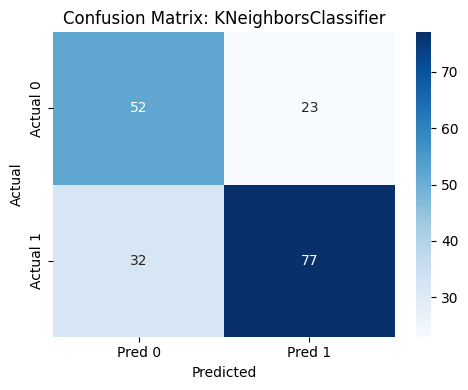

GradientBoostingClassifier Accuracy: 0.84
GradientBoostingClassifier F1 Score: 0.84
GradientBoostingClassifier Precision: 0.85
GradientBoostingClassifier Recall (TPR): 0.84
GradientBoostingClassifier True Negative Rate (TNR): 0.84
GradientBoostingClassifier True Positive Rate (TPR): 0.84
GradientBoostingClassifier ROC AUC: 0.91
--------------------------------------------------


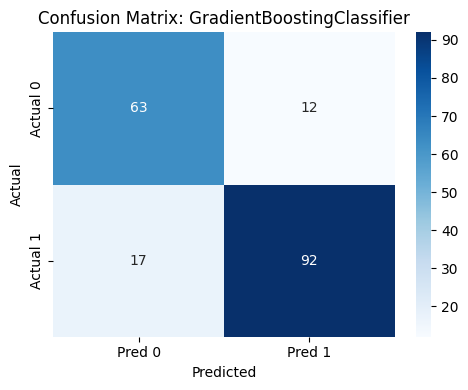

XGBClassifier Accuracy: 0.86
XGBClassifier F1 Score: 0.86
XGBClassifier Precision: 0.87
XGBClassifier Recall (TPR): 0.86
XGBClassifier True Negative Rate (TNR): 0.88
XGBClassifier True Positive Rate (TPR): 0.85
XGBClassifier ROC AUC: 0.90
--------------------------------------------------


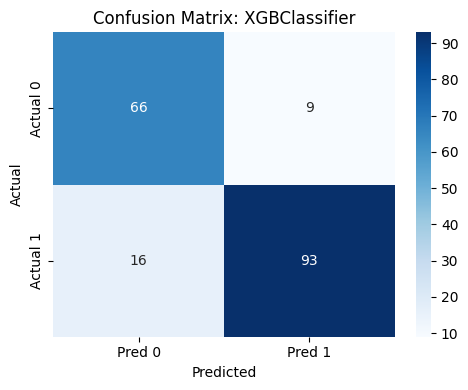

AdaBoostClassifier Accuracy: 0.82
AdaBoostClassifier F1 Score: 0.82
AdaBoostClassifier Precision: 0.82
AdaBoostClassifier Recall (TPR): 0.82
AdaBoostClassifier True Negative Rate (TNR): 0.80
AdaBoostClassifier True Positive Rate (TPR): 0.83
AdaBoostClassifier ROC AUC: 0.88
--------------------------------------------------


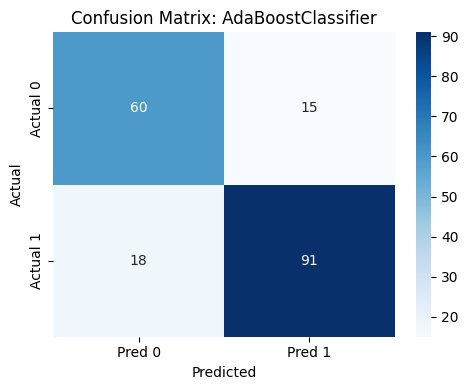

BaggingClassifier Accuracy: 0.82
BaggingClassifier F1 Score: 0.82
BaggingClassifier Precision: 0.83
BaggingClassifier Recall (TPR): 0.82
BaggingClassifier True Negative Rate (TNR): 0.85
BaggingClassifier True Positive Rate (TPR): 0.79
BaggingClassifier ROC AUC: 0.89
--------------------------------------------------


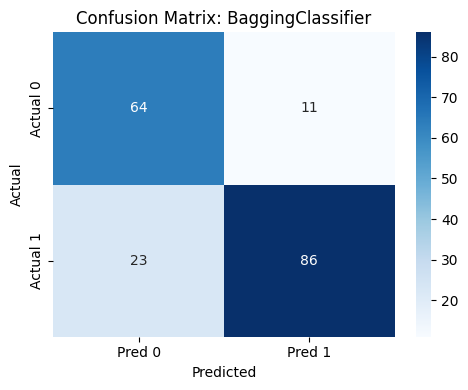

CatBoostClassifier Accuracy: 0.84
CatBoostClassifier F1 Score: 0.84
CatBoostClassifier Precision: 0.84
CatBoostClassifier Recall (TPR): 0.84
CatBoostClassifier True Negative Rate (TNR): 0.81
CatBoostClassifier True Positive Rate (TPR): 0.85
CatBoostClassifier ROC AUC: 0.91
--------------------------------------------------


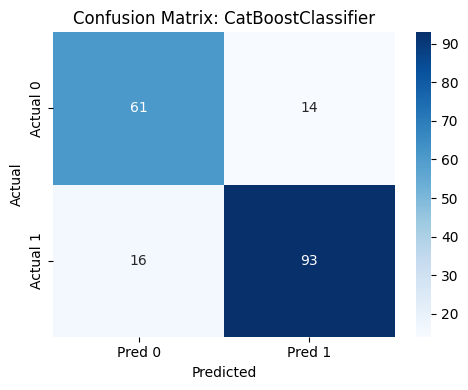

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

model_scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    tnr = tn / (tn + fp)
    tpr = tp / (tp + fn)

    # Append metrics
    model_scores.append((name, accuracy, f1, precision, recall, roc_auc, tnr, tpr))

    # Print results
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} F1 Score: {f1:.2f}")
    print(f"{name} Precision: {precision:.2f}")
    print(f"{name} Recall (TPR): {recall:.2f}")
    print(f"{name} True Negative Rate (TNR): {tnr:.2f}")
    print(f"{name} True Positive Rate (TPR): {tpr:.2f}")
    if roc_auc is not None:
        print(f"{name} ROC AUC: {roc_auc:.2f}")
    print("-" * 50)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


In [52]:
for name, accuracy, f1, *rest in model_scores:
    print(f"{name}: Accuracy = {accuracy:.2f}, F1 Score = {f1:.2f}")

LogisticRegression: Accuracy = 0.80, F1 Score = 0.80
SVM: Accuracy = 0.76, F1 Score = 0.76
DecisionTreeClassifier: Accuracy = 0.77, F1 Score = 0.77
RandomForestClassifier: Accuracy = 0.84, F1 Score = 0.84
GaussianNB: Accuracy = 0.80, F1 Score = 0.80
KNeighborsClassifier: Accuracy = 0.70, F1 Score = 0.70
GradientBoostingClassifier: Accuracy = 0.84, F1 Score = 0.84
XGBClassifier: Accuracy = 0.86, F1 Score = 0.86
AdaBoostClassifier: Accuracy = 0.82, F1 Score = 0.82
BaggingClassifier: Accuracy = 0.82, F1 Score = 0.82
CatBoostClassifier: Accuracy = 0.84, F1 Score = 0.84


In [53]:
import sklearn
print(sklearn.__version__)

1.2.2


In [54]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: d:\AISYAH\KULIAH\BENGKEL KODING\Tugas Akhir\cardiovascular-prediction\cardiovascular-env\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [55]:
import joblib

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Save AdaBoost model
    if name == 'AdaBoostClassifier':
        joblib.dump(model, 'adaboost_modelfix.pkl')
        print("Model AdaBoost berhasil disimpan sebagai 'adaboost_model.pkl'")


Model AdaBoost berhasil disimpan sebagai 'adaboost_model.pkl'


# SHAP and LIME

In [ ]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


Evaluating feature importance using SHAP for AdaBoostClassifier


PermutationExplainer explainer: 177it [00:56,  2.72it/s]                         


SHAP Summary Plot for AdaBoostClassifier


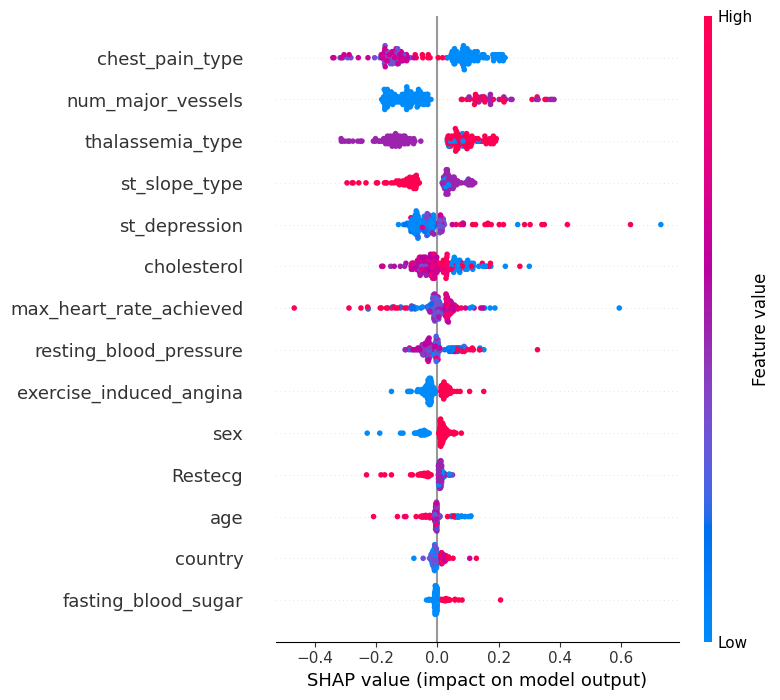

Evaluating feature importance using LIME for AdaBoostClassifier
LIME Explanation for AdaBoostClassifier (Instance 0):




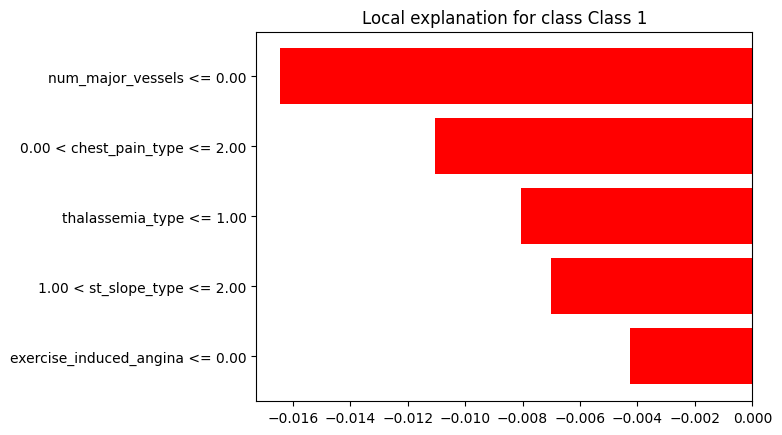

In [ ]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

# Get feature names from X
feature_names = X.columns.tolist()

# Ensure X_train and X_test are in DataFrame format
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Initialize the AdaBoost model
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# ======= Evaluation with SHAP =======
print("Evaluating feature importance using SHAP for AdaBoostClassifier")

try:
    explainer_shap = shap.Explainer(model.predict, X_train)  # Fix: Use general Explainer
    shap_values = explainer_shap(X_test)

    print("SHAP Summary Plot for AdaBoostClassifier")
    shap.summary_plot(shap_values, X_test)  # Visualize SHAP
    plt.show()
    plt.savefig("shap_summary_plot.png", bbox_inches='tight')  # Simpan sebagai file
    plt.close()
except Exception as e:
    print(f"SHAP not supported for AdaBoostClassifier: {e}")

# ======= Evaluation with LIME =======
print("Evaluating feature importance using LIME for AdaBoostClassifier")

try:
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.to_numpy(),
        feature_names=X_train.columns.tolist(),
        class_names=["Class 0", "Class 1"],
        discretize_continuous=True
    )

    idx = 0  # Select an instance to explain
    sample_instance = X_test.iloc[idx]

    exp = explainer_lime.explain_instance(sample_instance, model.predict_proba, num_features=5)

    print(f"LIME Explanation for AdaBoostClassifier (Instance {idx}):")
    print("\n")
    exp.show_in_notebook()
    exp.as_pyplot_figure()
    plt.show()
    fig = exp.as_pyplot_figure()
    fig.savefig("lime_explanation.png", bbox_inches='tight')  # Simpan file
    plt.close(fig)

except Exception as e:
    print(f"LIME not supported for AdaBoostClassifier: {e}")


# Spearman


Evaluating feature importance using SHAP for AdaBoostClassifier




PermutationExplainer explainer: 177it [00:52,  2.72it/s]                         


SHAP Summary Plot for AdaBoostClassifier


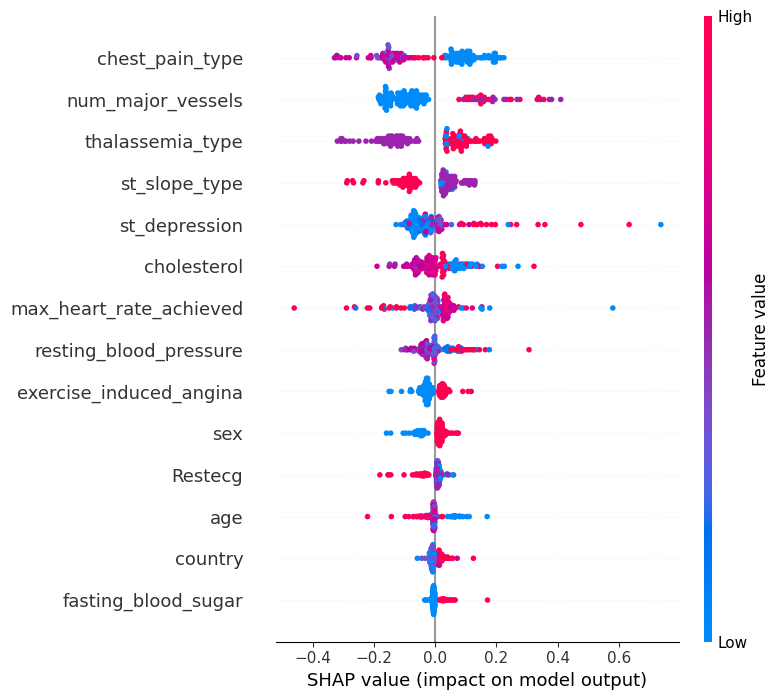

Evaluating feature importance using LIME for AdaBoostClassifier
LIME Explanation for AdaBoostClassifier (Instance 0):


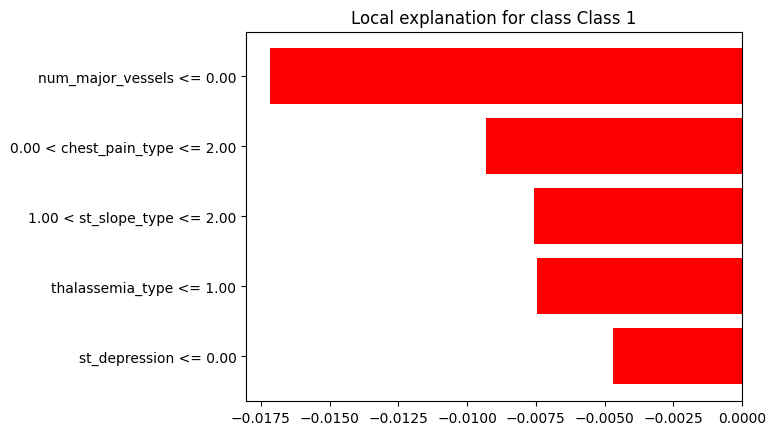


Menghitung SHAP Feature Importance...

Menghitung LIME Feature Importance...

Menghitung Korelasi Spearman terhadap Target...

Membuat Tabel Gabungan...

=== Tabel Gabungan SHAP, LIME, dan Korelasi Spearman ===
                         SHAP_Importance  LIME_Importance  \
chest_pain_type                 0.130550         0.009274   
num_major_vessels               0.127034         0.015774   
thalassemia_type                0.120097         0.007561   
st_slope_type                   0.075070         0.006959   
st_depression                   0.067553         0.005542   
cholesterol                     0.057094         0.002602   
max_heart_rate_achieved         0.050324         0.012947   
resting_blood_pressure          0.041218         0.002311   
exercise_induced_angina         0.030667         0.002740   
sex                             0.027263         0.000000   
Restecg                         0.020413         0.002992   
age                             0.020318         0.00211

In [ ]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

# Get feature names from X
feature_names = X.columns.tolist()

# Ensure X_train and X_test are in DataFrame format
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Initialize the AdaBoost model
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# ======= Evaluation with SHAP =======
print("\nEvaluating feature importance using SHAP for AdaBoostClassifier")
print("\n")

try:
    explainer_shap = shap.Explainer(model.predict, X_train)
    shap_values = explainer_shap(X_test)

    print("SHAP Summary Plot for AdaBoostClassifier")
    shap.summary_plot(shap_values, X_test)
    plt.show()
    plt.savefig("shap_summary_plot.png", bbox_inches='tight')
    plt.close()
except Exception as e:
    print(f"SHAP not supported for AdaBoostClassifier: {e}")

# ======= Evaluation with LIME =======
print("Evaluating feature importance using LIME for AdaBoostClassifier")

try:
    explainer_lime = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.to_numpy(),
        feature_names=X_train.columns.tolist(),
        class_names=["Class 0", "Class 1"],
        discretize_continuous=True
    )

    idx = 0
    sample_instance = X_test.iloc[idx]

    exp = explainer_lime.explain_instance(sample_instance, model.predict_proba, num_features=5)

    print(f"LIME Explanation for AdaBoostClassifier (Instance {idx}):")
    exp.show_in_notebook()
    exp.as_pyplot_figure()
    plt.show()
    fig = exp.as_pyplot_figure()
    fig.savefig("lime_explanation.png", bbox_inches='tight')
    plt.close(fig)

except Exception as e:
    print(f"LIME not supported for AdaBoostClassifier: {e}")

# ======= SHAP Feature Importance =======
print("\nMenghitung SHAP Feature Importance...")

shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_feature_importance = pd.Series(shap_importance, index=feature_names).sort_values(ascending=False)
shap_feature_importance.name = "SHAP_Importance"

# ======= LIME Feature Importance (Aggregate over multiple instances) =======
print("\nMenghitung LIME Feature Importance...")

lime_weights = {f: [] for f in feature_names}
for i in range(min(50, len(X_test))):
    sample_instance = X_test.iloc[i]
    exp = explainer_lime.explain_instance(sample_instance, model.predict_proba, num_features=len(feature_names))
    for feature, weight in exp.as_list():
        fname = feature.split()[0]
        if fname in lime_weights:
            lime_weights[fname].append(abs(weight))

lime_importance = {f: np.mean(w) if w else 0 for f, w in lime_weights.items()}
lime_feature_importance = pd.Series(lime_importance).sort_values(ascending=False)
lime_feature_importance.name = "LIME_Importance"

# ======= Korelasi Spearman terhadap Target =======
print("\nMenghitung Korelasi Spearman terhadap Target...")

df_corr = X.copy()
df_corr['target'] = y
spearman_corr = df_corr.corr(method='spearman')['target'].drop('target').sort_values(ascending=False)
spearman_corr.name = "Spearman_Correlation"

# ======= Gabungkan Semua ke dalam Tabel =======
print("\nMembuat Tabel Gabungan...")

importance_df = pd.concat([shap_feature_importance, lime_feature_importance, spearman_corr], axis=1).fillna(0)

importance_df['SHAP_Rank'] = importance_df['SHAP_Importance'].rank(ascending=False).astype(int)
importance_df['LIME_Rank'] = importance_df['LIME_Importance'].rank(ascending=False).astype(int)
importance_df['Spearman_Rank'] = importance_df['Spearman_Correlation'].abs().rank(ascending=False).astype(int)

importance_df = importance_df.sort_values(by='SHAP_Rank')

# Tampilkan hasil
print("\n=== Tabel Gabungan SHAP, LIME, dan Korelasi Spearman ===")
print(importance_df)

# Simpan ke file CSV (opsional)
importance_df.to_csv("feature_importance_comparison.csv", index=True)


In [ ]:
from scipy.stats import spearmanr, kendalltau

# ========================
# Perbandingan Ranking
# ========================

# Ambil ranking dari dataframe
shap_rank = importance_df['SHAP_Rank']
lime_rank = importance_df['LIME_Rank']
spearman_rank = importance_df['Spearman_Rank']

# ===== Spearman Correlation =====
shap_vs_spearman_s = spearmanr(shap_rank, spearman_rank).correlation
lime_vs_spearman_s = spearmanr(lime_rank, spearman_rank).correlation

# ===== Kendall Tau Correlation =====
shap_vs_spearman_k = kendalltau(shap_rank, spearman_rank).correlation
lime_vs_spearman_k = kendalltau(lime_rank, spearman_rank).correlation

# ========================
# Tampilkan Hasil Evaluasi
# ========================
print("\n=== Korelasi Ranking Fitur ===")
print(f"Spearman Correlation (SHAP vs Spearman): {shap_vs_spearman_s:.3f}")
print(f"Spearman Correlation (LIME vs Spearman): {lime_vs_spearman_s:.3f}")
print(f"Kendall's Tau (SHAP vs Spearman):        {shap_vs_spearman_k:.3f}")
print(f"Kendall's Tau (LIME vs Spearman):        {lime_vs_spearman_k:.3f}")

# (Opsional) Buat tabel hasil
evaluation_df = pd.DataFrame({
    "Spearman_Correlation": [shap_vs_spearman_s, lime_vs_spearman_s],
    "Kendall_Tau": [shap_vs_spearman_k, lime_vs_spearman_k]
}, index=["SHAP", "LIME"])

print("\n=== Tabel Evaluasi Metode Interpretasi ===")
print(evaluation_df)

# Simpan ke CSV (jika ingin)
evaluation_df.to_csv("shap_vs_lime_correlation.csv")



=== Korelasi Ranking Fitur ===
Spearman Correlation (SHAP vs Spearman): 0.657
Spearman Correlation (LIME vs Spearman): 0.569
Kendall's Tau (SHAP vs Spearman):        0.560
Kendall's Tau (LIME vs Spearman):        0.341

=== Tabel Evaluasi Metode Interpretasi ===
      Spearman_Correlation  Kendall_Tau
SHAP              0.657143     0.560440
LIME              0.569231     0.340659


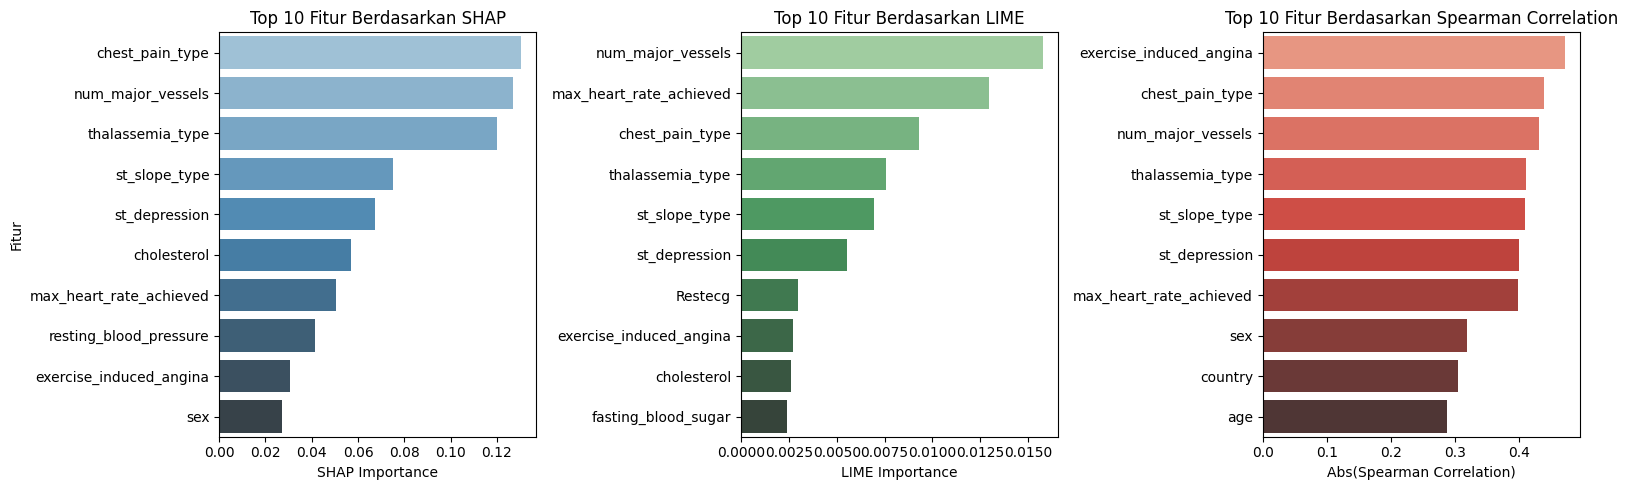

In [ ]:
# ======= Visualisasi Barplot: Top 10 Fitur =======

top_n = 10
plt.figure(figsize=(16, 5))

# Urutkan berdasarkan nilai importance secara descending (paling penting ke tidak penting)
shap_top = importance_df.sort_values(by="SHAP_Importance", ascending=False).head(top_n)
lime_top = importance_df.sort_values(by="LIME_Importance", ascending=False).head(top_n)
spearman_top = importance_df.reindex(importance_df['Spearman_Correlation'].abs().sort_values(ascending=False).head(top_n).index)

# SHAP
plt.subplot(1, 3, 1)
sns.barplot(x=shap_top["SHAP_Importance"], y=shap_top.index, palette="Blues_d")
plt.title("Top 10 Fitur Berdasarkan SHAP")
plt.xlabel("SHAP Importance")
plt.ylabel("Fitur")

# LIME
plt.subplot(1, 3, 2)
sns.barplot(x=lime_top["LIME_Importance"], y=lime_top.index, palette="Greens_d")
plt.title("Top 10 Fitur Berdasarkan LIME")
plt.xlabel("LIME Importance")
plt.ylabel("")

# Spearman
plt.subplot(1, 3, 3)
sns.barplot(x=spearman_top["Spearman_Correlation"].abs(), y=spearman_top.index, palette="Reds_d")
plt.title("Top 10 Fitur Berdasarkan Spearman Correlation")
plt.xlabel("Abs(Spearman Correlation)")
plt.ylabel("")

plt.tight_layout()
plt.savefig("top10_feature_importance_comparison_sorted.png", bbox_inches='tight')
plt.show()


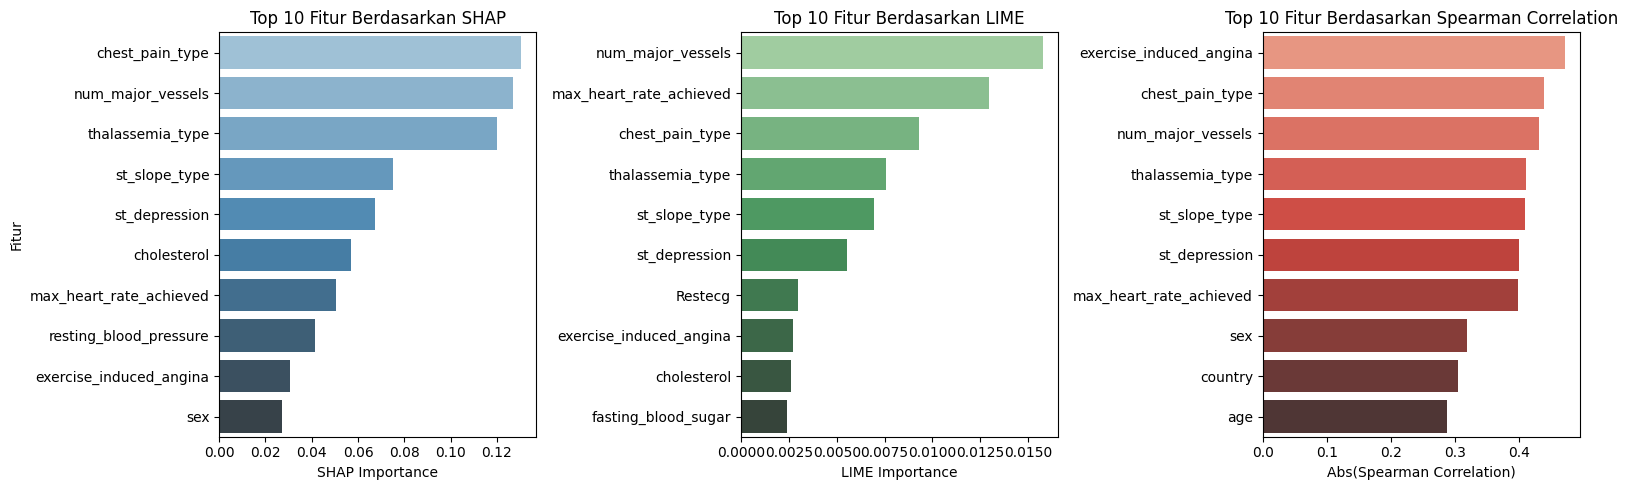

⚠️ Fitur berikut bertipe non-numerik dan dilewati untuk heatmap:
['sex']


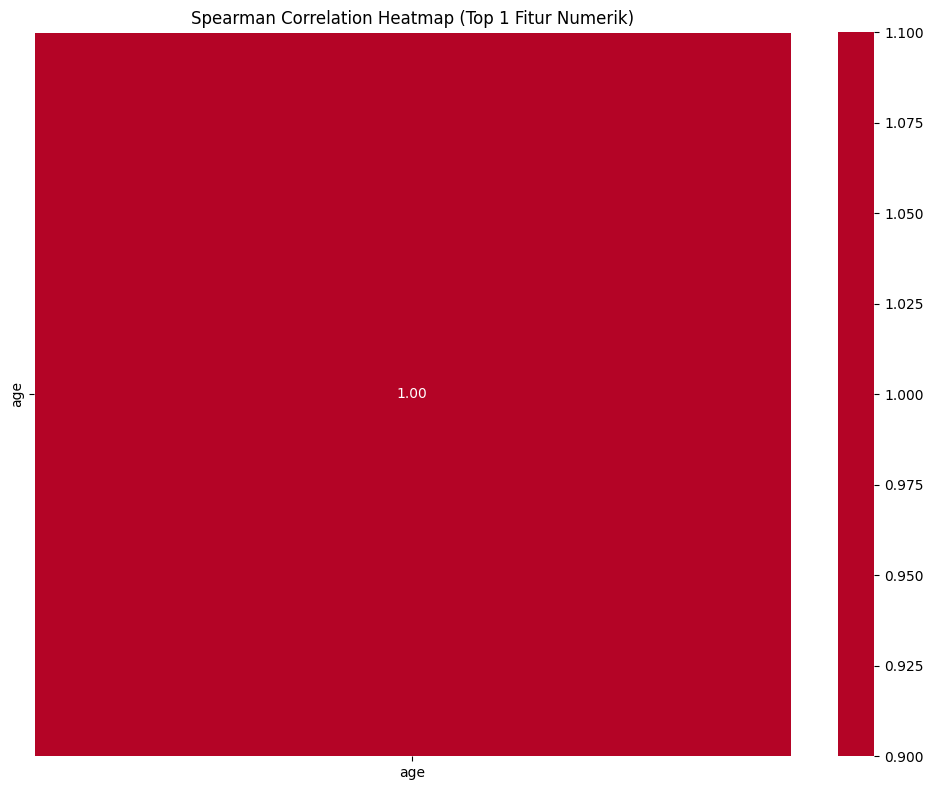

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ======= Visualisasi Barplot: Top 10 Fitur =======
top_n = 10
plt.figure(figsize=(16, 5))

# Urutkan berdasarkan nilai importance secara descending (paling penting ke tidak penting)
shap_top = importance_df.sort_values(by="SHAP_Importance", ascending=False).head(top_n)
lime_top = importance_df.sort_values(by="LIME_Importance", ascending=False).head(top_n)
spearman_top = importance_df.reindex(importance_df['Spearman_Correlation'].abs().sort_values(ascending=False).head(top_n).index)

# SHAP
plt.subplot(1, 3, 1)
sns.barplot(x=shap_top["SHAP_Importance"], y=shap_top.index, palette="Blues_d")
plt.title("Top 10 Fitur Berdasarkan SHAP")
plt.xlabel("SHAP Importance")
plt.ylabel("Fitur")

# LIME
plt.subplot(1, 3, 2)
sns.barplot(x=lime_top["LIME_Importance"], y=lime_top.index, palette="Greens_d")
plt.title("Top 10 Fitur Berdasarkan LIME")
plt.xlabel("LIME Importance")
plt.ylabel("")

# Spearman
plt.subplot(1, 3, 3)
sns.barplot(x=spearman_top["Spearman_Correlation"].abs(), y=spearman_top.index, palette="Reds_d")
plt.title("Top 10 Fitur Berdasarkan Spearman Correlation")
plt.xlabel("Abs(Spearman Correlation)")
plt.ylabel("")

plt.tight_layout()
plt.savefig("top10_feature_importance_comparison_sorted.png", bbox_inches='tight')
plt.show()

# Ambil top-N fitur berdasarkan nilai absolut korelasi Spearman tertinggi
#top_n = 10

# Ambil fitur dengan korelasi tertinggi (Spearman)
top_features = importance_df['Spearman_Correlation'].abs().sort_values(ascending=False).head(top_n).index

# Filter fitur yang ada di df dan bertipe numerik
existing_features = [feat for feat in top_features if feat in df.columns and pd.api.types.is_numeric_dtype(df[feat])]

# Warning kalau ada yang tidak numerik
skipped = [feat for feat in top_features if feat in df.columns and not pd.api.types.is_numeric_dtype(df[feat])]
if skipped:
    print("⚠️ Fitur berikut bertipe non-numerik dan dilewati untuk heatmap:")
    print(skipped)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[existing_features].corr(method='spearman'), annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title(f"Spearman Correlation Heatmap (Top {len(existing_features)} Fitur Numerik)")
plt.tight_layout()
plt.savefig("spearman_top_features_heatmap_clean.png", bbox_inches='tight')
plt.show()




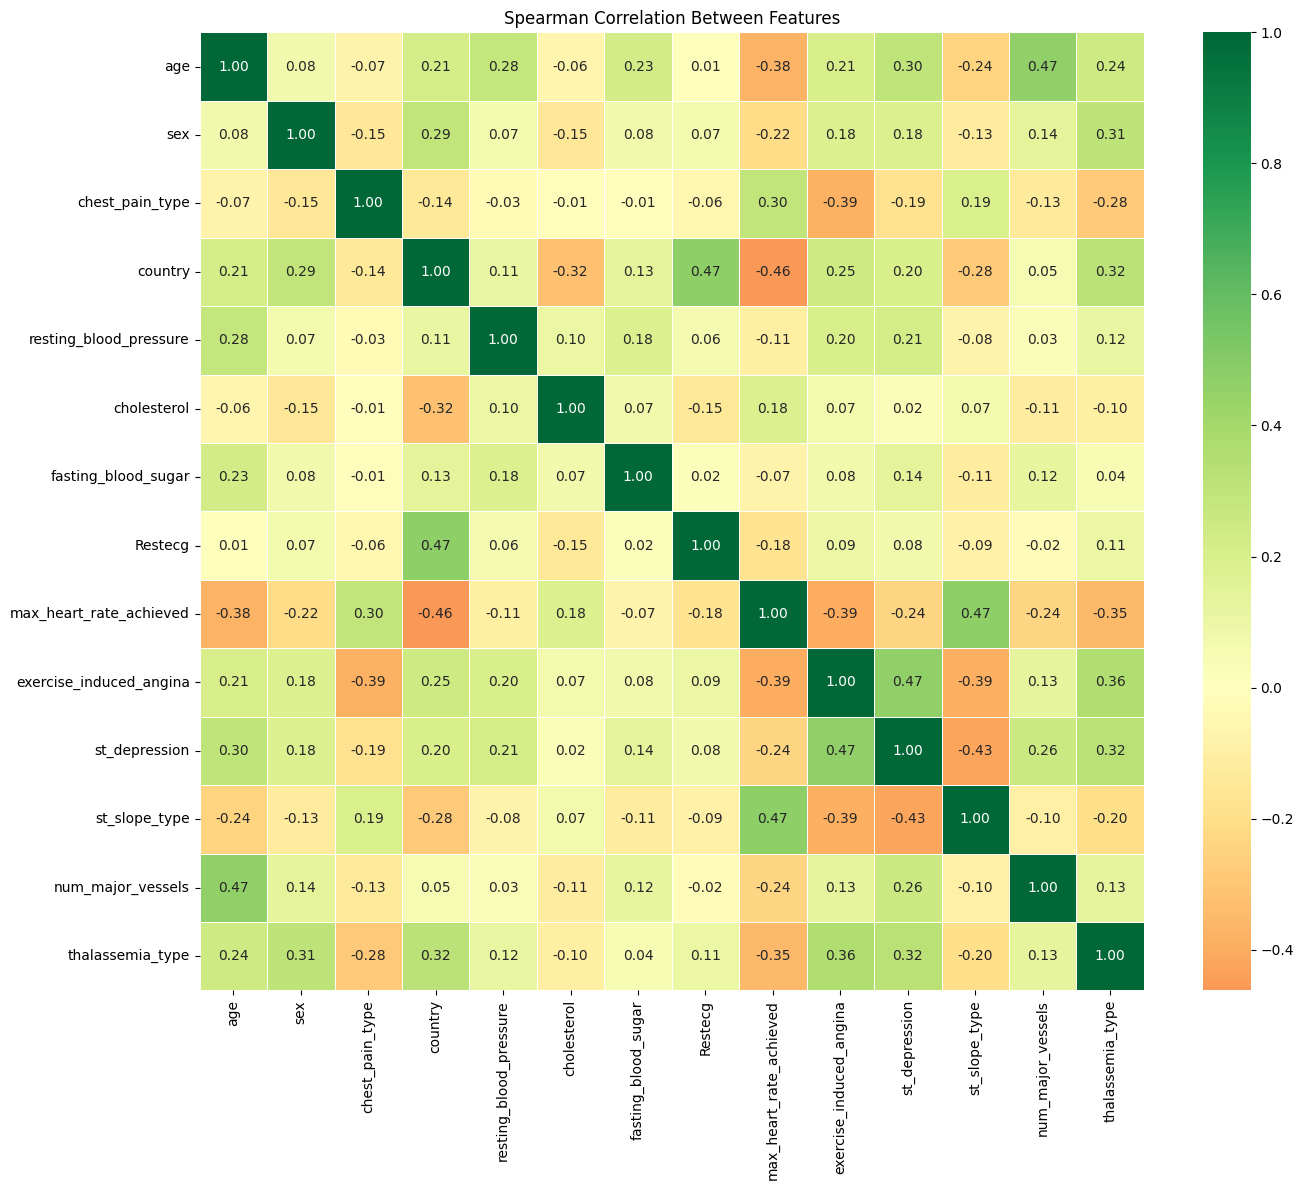

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya ini dataset setelah preprocessing dan training
# Gantilah `X_train` dengan nama DataFrame yang kamu pakai
# (harus sudah tanpa kolom target)

# Ambil hanya kolom numerik
df_numeric = X_train.select_dtypes(include=['int64', 'float64'])

# Hitung Spearman Correlation
corr = df_numeric.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn", center=0, linewidths=0.5)
plt.title("Spearman Correlation Between Features")
plt.tight_layout()
plt.savefig("spearman_heatmap_features_trained.png", bbox_inches='tight')
plt.show()


# Kendall and Jaccard

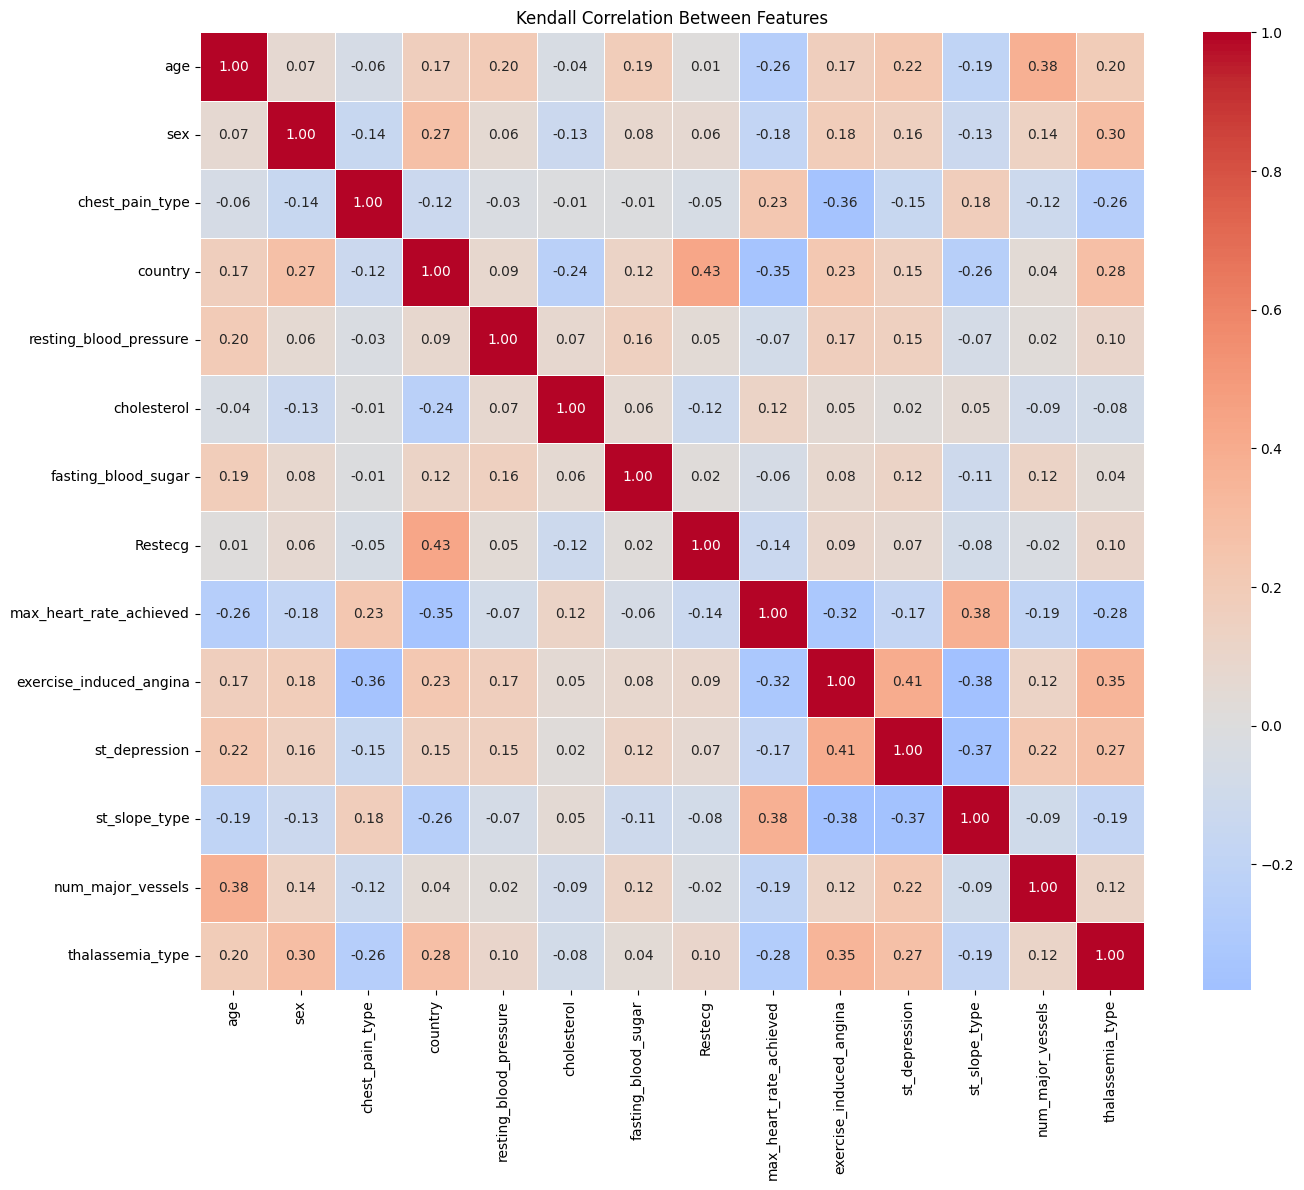

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ambil hanya kolom numerik dari data (pastikan X_train sudah disiapkan)
df_numeric = X_train.select_dtypes(include=['int64', 'float64'])

# Hitung Kendall Correlation
corr_kendall = df_numeric.corr(method='kendall')

# Plot heatmap Kendall
plt.figure(figsize=(14, 12))
sns.heatmap(corr_kendall, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Kendall Correlation Between Features")
plt.tight_layout()
plt.savefig("kendall_heatmap_features_trained.png", bbox_inches='tight')
plt.show()


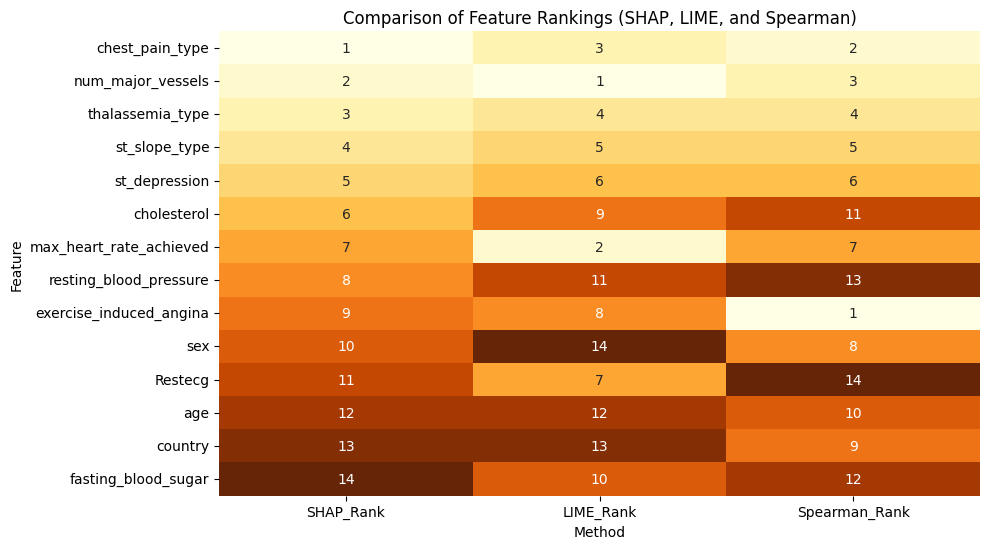

In [ ]:
# ======= Heatmap Perbandingan Rank =======
plt.figure(figsize=(10, len(importance_df) * 0.4))

ranking_df = importance_df[['SHAP_Rank', 'LIME_Rank', 'Spearman_Rank']]
sns.heatmap(ranking_df, annot=True, cmap="YlOrBr", cbar=False, fmt="d")
plt.title("Comparison of Feature Rankings (SHAP, LIME, and Spearman)")
plt.xlabel("Method")
plt.ylabel("Feature")

plt.tight_layout()
plt.savefig("feature_rank_comparison_heatmap.png", bbox_inches='tight')
plt.show()


In [ ]:
from scipy.stats import kendalltau

# ======= Jaccard Index =======
def jaccard_index(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

top_k = 10
shap_top_k = set(importance_df.sort_values('SHAP_Importance', ascending=False).head(top_k).index)
lime_top_k = set(importance_df.sort_values('LIME_Importance', ascending=False).head(top_k).index)
spearman_top_k = set(importance_df.sort_values('Spearman_Correlation', key=np.abs, ascending=False).head(top_k).index)

jaccard_shap_lime = jaccard_index(shap_top_k, lime_top_k)
jaccard_shap_spearman = jaccard_index(shap_top_k, spearman_top_k)
jaccard_lime_spearman = jaccard_index(lime_top_k, spearman_top_k)

print("\n=== Jaccard Index untuk Top 10 Features ===")
print(f"SHAP vs LIME: {jaccard_shap_lime:.3f}")
print(f"SHAP vs Spearman: {jaccard_shap_spearman:.3f}")
print(f"LIME vs Spearman: {jaccard_lime_spearman:.3f}")

# ======= Kendall's Tau Correlation =======
kendall_shap_lime = kendalltau(importance_df['SHAP_Rank'], importance_df['LIME_Rank']).correlation
kendall_shap_spearman = kendalltau(importance_df['SHAP_Rank'], importance_df['Spearman_Rank']).correlation
kendall_lime_spearman = kendalltau(importance_df['LIME_Rank'], importance_df['Spearman_Rank']).correlation

print("\n=== Kendall's Tau Correlation antara Ranking Fitur ===")
print(f"SHAP vs LIME: {kendall_shap_lime:.3f}")
print(f"SHAP vs Spearman: {kendall_shap_spearman:.3f}")
print(f"LIME vs Spearman: {kendall_lime_spearman:.3f}")



=== Jaccard Index untuk Top 10 Features ===
SHAP vs LIME: 0.667
SHAP vs Spearman: 0.667
LIME vs Spearman: 0.538

=== Kendall's Tau Correlation antara Ranking Fitur ===
SHAP vs LIME: 0.604
SHAP vs Spearman: 0.560
LIME vs Spearman: 0.341


In [ ]:
from scipy.stats import kendalltau

# Ambil top 10 fitur dari SHAP dan LIME
top_10_shap = importance_df.sort_values(by='SHAP_Rank').head(10).index.tolist()
top_10_lime = importance_df.sort_values(by='LIME_Rank').head(10).index.tolist()

# --- Kendal Tau Calculation ---
def get_ranking_dict(feature_list):
    return {feature: rank for rank, feature in enumerate(feature_list)}

shap_rank_dict = get_ranking_dict(top_10_shap)
lime_rank_dict = get_ranking_dict(top_10_lime)

# Gabungkan semua fitur unik
all_features = list(set(top_10_shap) | set(top_10_lime))

# Buat ranking untuk fitur2 di union list
shap_ranks = [shap_rank_dict.get(f, len(all_features)) for f in all_features]
lime_ranks = [lime_rank_dict.get(f, len(all_features)) for f in all_features]

kendall_tau_corr, _ = kendalltau(shap_ranks, lime_ranks)

# --- Jaccard Index Calculation ---
def compute_jaccard(set1, set2):
    return len(set(set1).intersection(set2)) / len(set(set1).union(set2))

jaccard_top5 = compute_jaccard(top_10_shap[:5], top_10_lime[:5])
jaccard_top10 = compute_jaccard(top_10_shap, top_10_lime)

# --- Print Results ---
print("\n=== Evaluasi Ranking SHAP vs LIME ===")
print(f"Kendall’s Tau Correlation: {kendall_tau_corr:.2f}")
print(f"Jaccard Index Top-5: {jaccard_top5:.2f}")
print(f"Jaccard Index Top-10: {jaccard_top10:.2f}")


=== Evaluasi Ranking SHAP vs LIME ===
Kendall’s Tau Correlation: 0.55
Jaccard Index Top-5: 0.67
Jaccard Index Top-10: 0.67


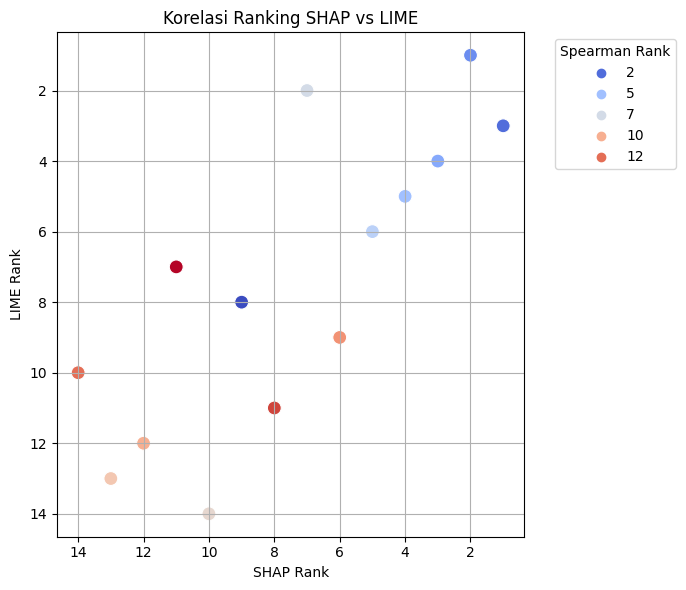

In [ ]:
# ======= Scatter Plot Korelasi Antara Rank SHAP dan LIME =======
plt.figure(figsize=(7, 6))
sns.scatterplot(data=importance_df, x='SHAP_Rank', y='LIME_Rank', hue='Spearman_Rank', palette='coolwarm', s=100)
plt.title("Korelasi Ranking SHAP vs LIME")
plt.xlabel("SHAP Rank")
plt.ylabel("LIME Rank")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend(title="Spearman Rank", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.savefig("shap_vs_lime_rank_scatter.png", bbox_inches='tight')
plt.show()


PermutationExplainer explainer: 177it [00:53,  2.71it/s]                         

SHAP Summary Plot for AdaBoost:


TypeError: only integer scalar arrays can be converted to a scalar index

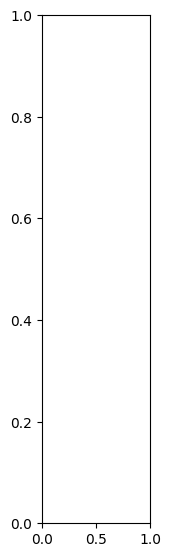

In [ ]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Asumsi: model (AdaBoostClassifier), X_train, dan X_test sudah ada
# ... (kode sebelumnya untuk melatih model dan memproses dataset) ...

# Feature evaluation using SHAP
explainer_shap = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer_shap(X_test)
print("SHAP Summary Plot for AdaBoost:")
shap.summary_plot(shap_values, X_test)

# Feature evaluation using LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),
    feature_names=X_train.columns.tolist(),
    class_names=["Class 0", "Class 1"],
    discretize_continuous=True
)

# Pilih satu instance untuk dijelaskan
idx = 0
exp = explainer_lime.explain_instance(X_test.iloc[idx], model.predict_proba, num_features=5)

print(f"LIME Explanation for AdaBoost (Instance {idx}):")
exp.show_in_notebook()
exp.as_pyplot_figure()
plt.show()

In [ ]:
# Rata-rata kontribusi tiap fitur
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_ranking = pd.Series(shap_importance, index=X.columns).sort_values(ascending=False)

In [ ]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Pastikan model AdaBoost sudah terlatih sebelumnya
model = AdaBoostClassifier(random_state=42)   # Model sudah ada sebelumnya

# Feature evaluation using SHAP
explainer_shap = shap.Explainer(model, X_train)
shap_values = explainer_shap(X_test)
print("SHAP Summary Plot for AdaBoost:")
shap.summary_plot(shap_values, X_test)

# Feature evaluation using LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),
    feature_names=X_train.columns.tolist(),
    class_names=["Class 0", "Class 1"],
    discretize_continuous=True
)

# Pilih satu instance untuk dijelaskan
idx = 0  
exp = explainer_lime.explain_instance(X_test.iloc[idx], model.predict_proba, num_features=5)

print(f"LIME Explanation for AdaBoost (Instance {idx}):")
exp.show_in_notebook()
exp.as_pyplot_figure()
plt.show()


In [ ]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

# Contoh data (Gantilah dengan dataset yang digunakan)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model AdaBoost
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)  # 👈 Latih model sebelum digunakan!

# Feature evaluation using SHAP
explainer_shap = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer_shap(X_test)
print("SHAP Summary Plot for AdaBoost:")
shap.summary_plot(shap_values, X_test)

# Feature evaluation using LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),
    feature_names=X_train.columns.tolist(),
    class_names=["Class 0", "Class 1"],
    discretize_continuous=True
)

# Pilih satu instance untuk dijelaskan
idx = 0  
exp = explainer_lime.explain_instance(
    X_test.iloc[idx].to_numpy().flatten(),  # 👉 Pastikan bentuknya 1D
    model.predict_proba, 
    num_features=5
)

print(f"LIME Explanation for AdaBoost (Instance {idx}):")
exp.show_in_notebook()
exp.as_pyplot_figure()
plt.show()
